In [176]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [177]:
data = pd.read_csv('insurance.csv')

In [302]:
data

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normalweight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior Adult,obese
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,obese
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,obese
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,Overweight


In [38]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Null Values
Checking null values in the data

In [10]:
miss = data.isnull().sum()
miss

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Target variable
Distribution of Medical Charges

Text(0, 0.5, 'Frequency')

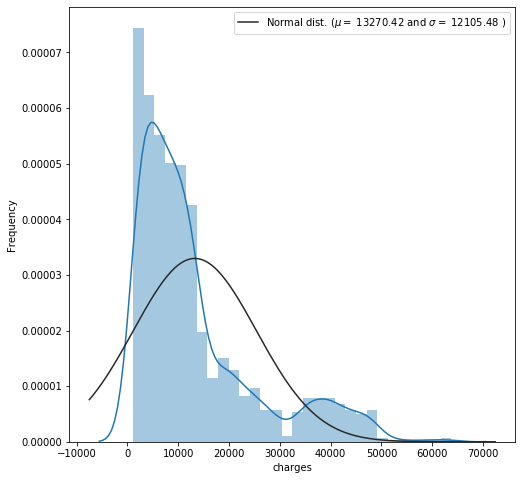

In [36]:
plt.subplots(figsize=(8,8))
sns.distplot(data['charges'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(data['charges'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

### Smokers Analysis

In [102]:
data.head()

region_smoker = pd.crosstab(data['smoker'], data['region'])
region_smoker

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


Distribution of medical charges by smokers

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

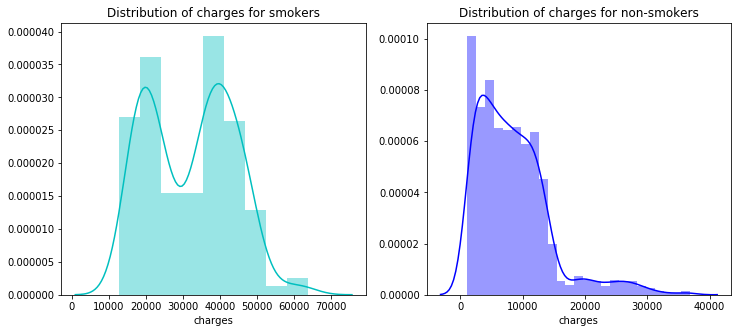

In [83]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

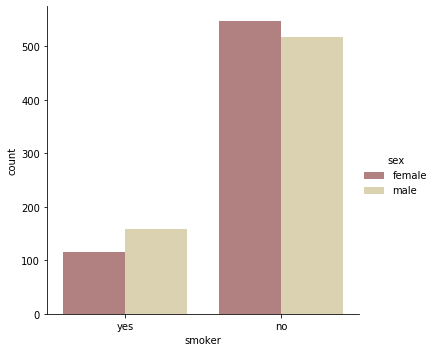

In [84]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

Text(0.5, 1, 'Distribution of charges and age for non-smokers')

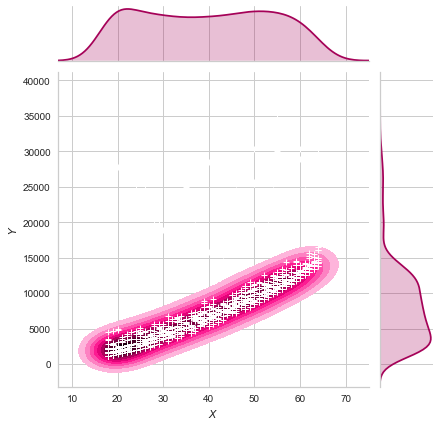

In [291]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 'no')],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1, 'Distribution of charges and age for smokers')

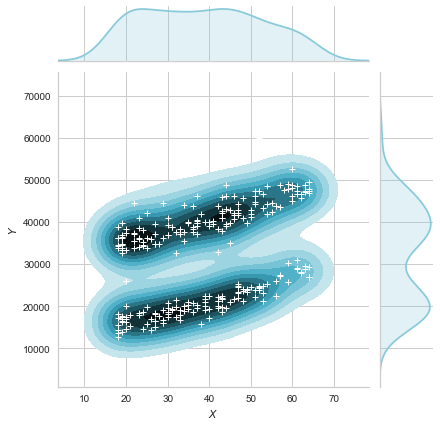

In [292]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 'yes')],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1, 'Smokers and non-smokers')

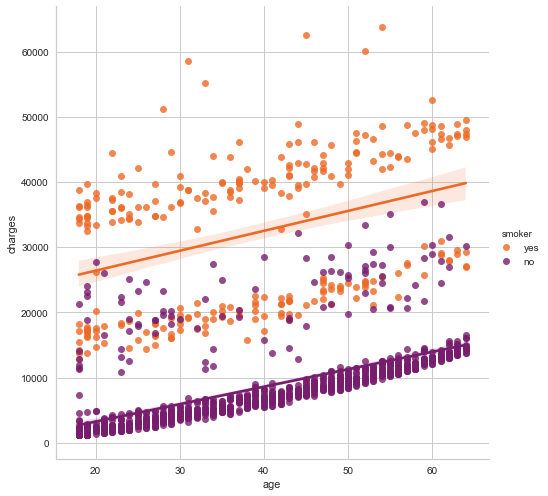

In [293]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

### Charges by region

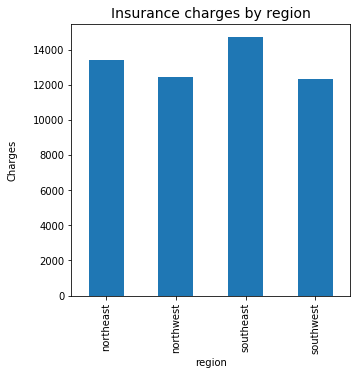

,region,charges
2,southeast,14735.411438
0,northeast,13406.384516
1,northwest,12417.575374
3,southwest,12346.937377


In [86]:
dfallcharges = data.groupby('region', as_index=False)['charges'].mean().dropna().sort_values('charges', ascending=False)
plt.title('Insurance charges by region', fontsize=14)
data.groupby('region')['charges'].mean().dropna().plot(kind='bar', figsize=(5,5))
plt.ylabel('Charges\n')
plt.show()
dfallcharges.head()

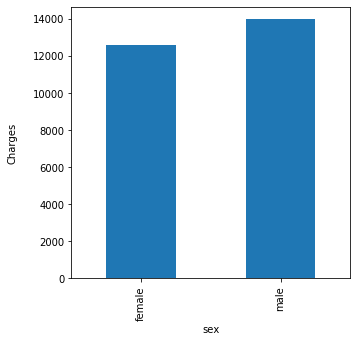

,sex,charges
1,male,13956.751178
0,female,12569.578844


In [85]:
dfallcharges = data.groupby('sex', as_index=False)['charges'].mean().dropna().sort_values('charges', ascending=False)
#plt.title('Insurance charges by region', fontsize=14)
data.groupby('sex')['charges'].mean().dropna().plot(kind='bar', figsize=(5, 5))
plt.ylabel('Charges\n')
plt.show()
dfallcharges.head()

### Age Analysis
Age Distribution

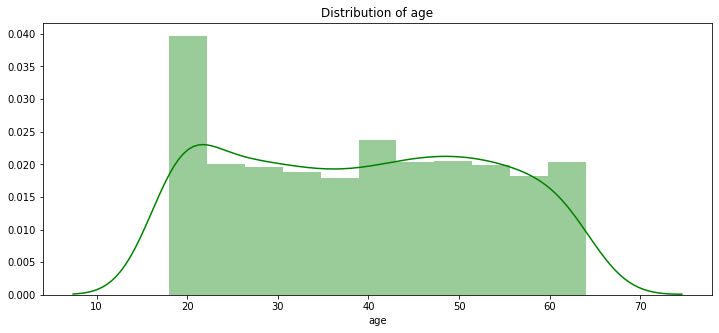

In [95]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Convert Age into Categorical Variables

In [239]:
bins = [18, 35, 55, 70]
labels = ['Young Adult', 'Senior Adult', 'Elder']
data['age_cat'] = pd.cut(data.age, bins, labels = labels,include_lowest = True)

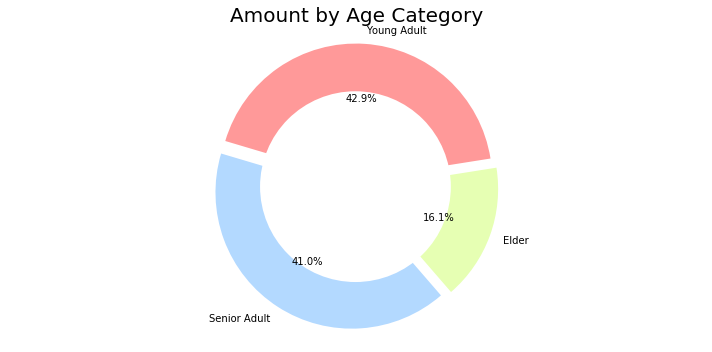

In [71]:
labels = data["age_cat"].unique().tolist()
sizes = data["age_cat"].value_counts().tolist()
color= ["#ff9999", "#b3d9ff", "#e6ffb3"]
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (10,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Amount by Age Category',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

Text(0.5, 1.0, 'Median Charge by Age')

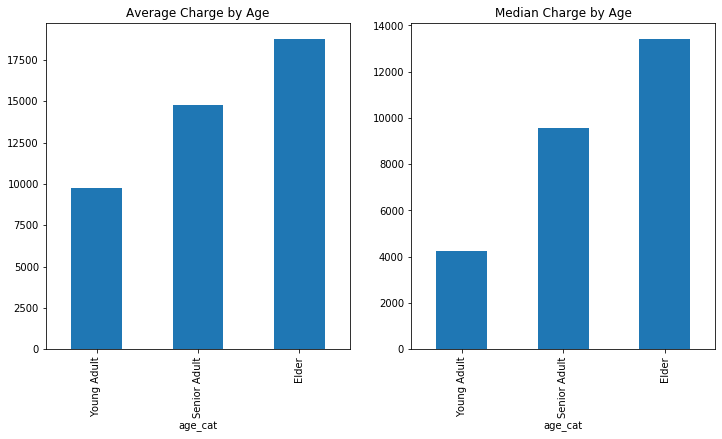

In [94]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
data.groupby(data['age_cat'])['charges'].mean().dropna().plot(kind='bar', figsize=(12, 6))
ax.set_title('Average Charge by Age')

ax=f.add_subplot(122)
data.groupby(data['age_cat'])['charges'].median().dropna().plot(kind='bar', figsize=(12, 6))
ax.set_title('Median Charge by Age')

### BMI Analysis
BMI Analysis

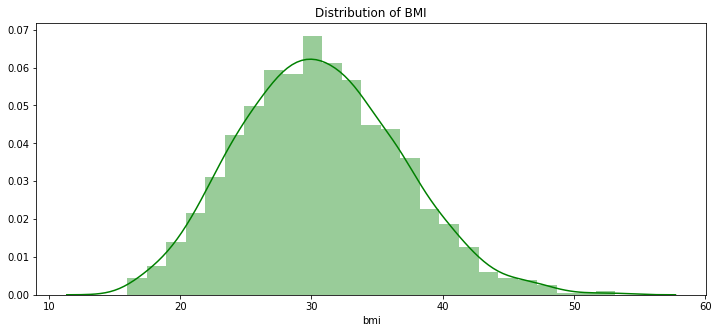

In [114]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
ax = sns.distplot(data["bmi"], color = 'g')

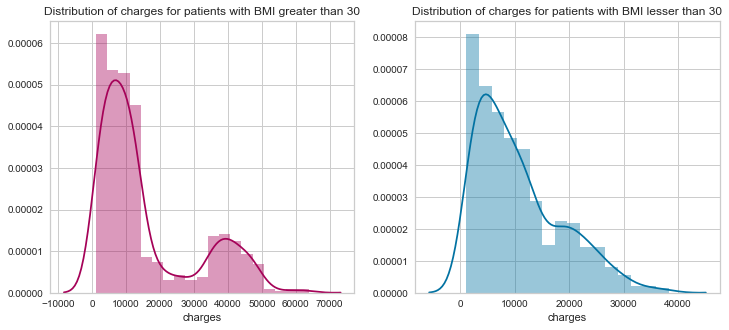

In [206]:
f=plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
ax.set_title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

ax=f.add_subplot(122)
ax.set_title("Distribution of charges for patients with BMI lesser than 30")
ax = sns.distplot(data[(data.bmi <= 30)]['charges'], color = 'b')

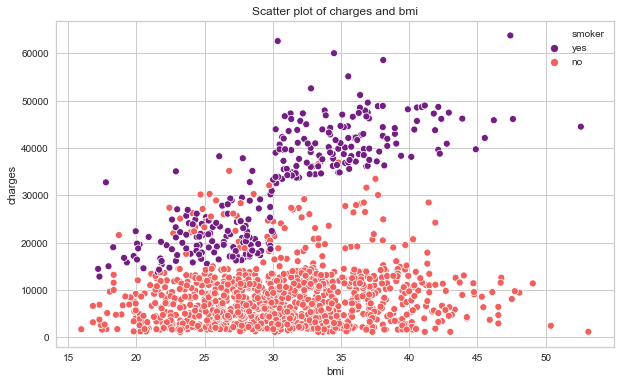

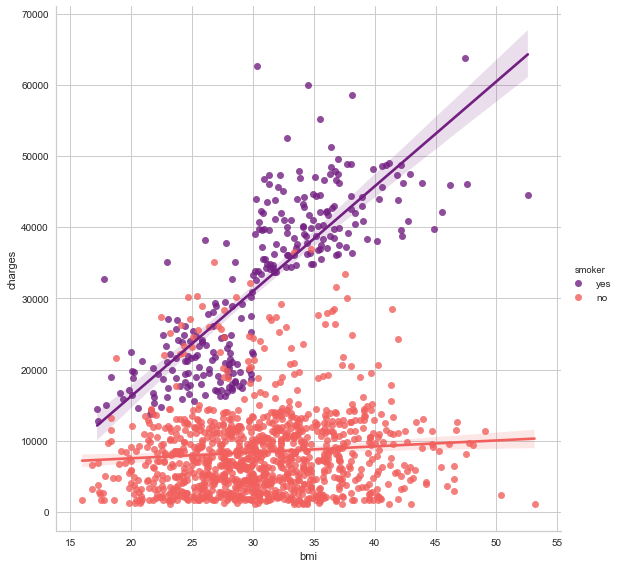

In [208]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

Convert BMI into Categorical Variables

In [240]:
bins = [14,18.5, 24.5,30,55]
labels = ['Underweight', 'Normalweight', 'Overweight','obese']
data['weight_condition'] = pd.cut(data.bmi, bins, labels = labels,include_lowest = True)

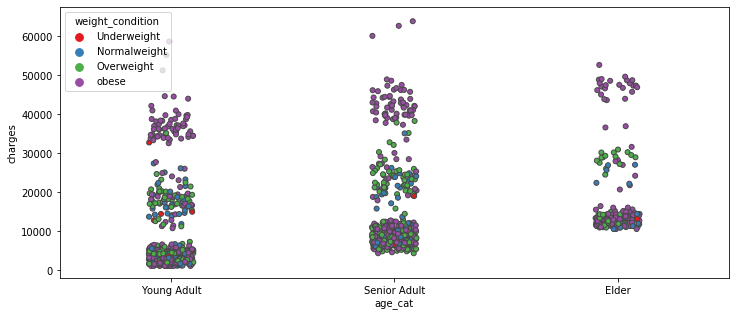

In [119]:
f= plt.figure(figsize=(12,5))
sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=data,  linewidth=1, palette="Set1")
#ax2.set_title("Relationship of Weight Condition, Age and Charges")

### Analyse Relationship between BMI and Age

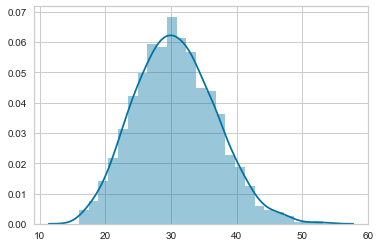

In [198]:
bmi = [data["bmi"].values.tolist()]
group_labels = ['Body Mass Index Distribution']

colors = ['#FA5858']

sns.distplot(bmi)
# Add title
#fig['layout'].update(title='Normal Distribution <br> Central Limit Theorem Condition')

#iplot(fig, filename='Basic Distplot')

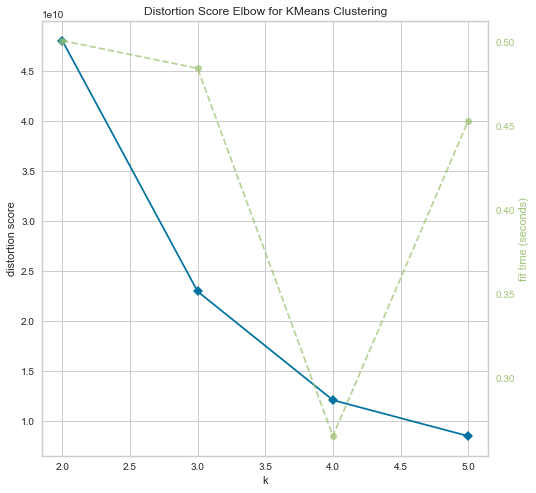

In [267]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(8,8))

# KNears Neighbors 


X = data[["bmi","age",'charges']]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  

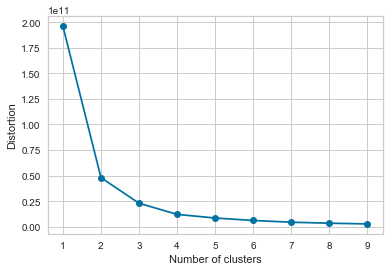

In [268]:
#X = new_df.drop(["age", "charges"],axis=1)
K = range(1,10) 
distortions = []
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)  
    distortions.append(kmeanModel.inertia_)
# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [335]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y2 = kmeans.fit_predict(X)

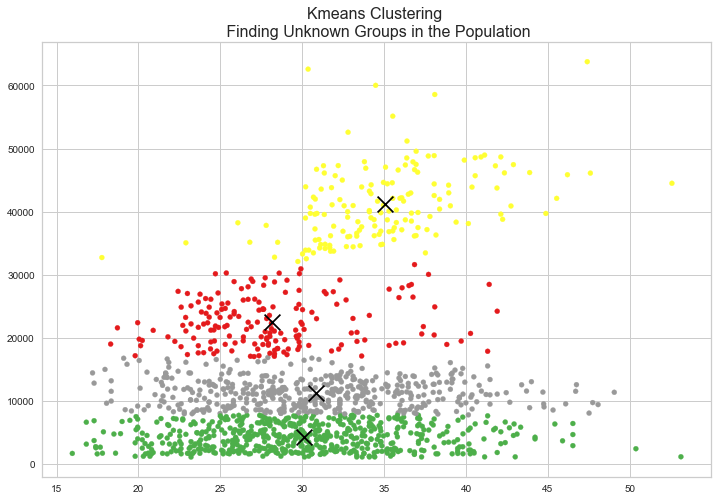

In [336]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0],X.values[:,2], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,2], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

In [357]:
df=pd.DataFrame()
df['charges']=data['charges']
df['bmi']=data['weight_condition']
df['age']=data['age_cat']
df['bmi_cluster']=y2
df

,charges,bmi,age,bmi_cluster
0,16884.92400,Overweight,Young Adult,1
1,1725.55230,obese,Young Adult,0
2,4449.46200,obese,Young Adult,0
3,21984.47061,Normalweight,Young Adult,1
4,3866.85520,Overweight,Young Adult,0
...,...,...,...,...
1333,10600.54830,obese,Senior Adult,0
1334,2205.98080,obese,Young Adult,0
1335,1629.83350,obese,Young Adult,0
1336,2007.94500,Overweight,Young Adult,0


In [307]:
df.to_csv("cluster.csv",index=False)

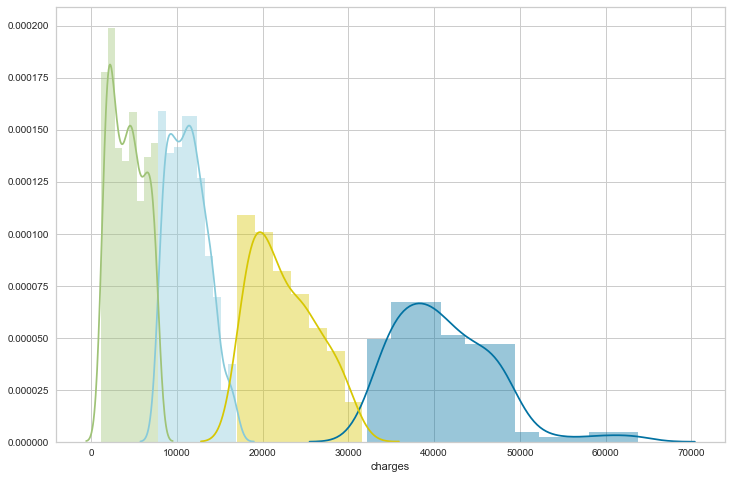

In [346]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(sns.distplot(df[(df.bmi_cluster == 0)]["charges"],color='c'))
#ax1.set_title('Distribution of charges for cluster 0')
ax2 = fig.add_subplot(sns.distplot(df[(df.bmi_cluster == 1)]['charges'],color='b'))
#ax2.set_title('Distribution of charges for cluster 1')
ax3 = fig.add_subplot(sns.distplot(df[(df.bmi_cluster == 2)]['charges'],color='g'))
#ax3.set_title('Distribution of charges for cluster 2'))
ax3 = fig.add_subplot(sns.distplot(df[(df.bmi_cluster == 3)]['charges'],color='y'))

In [339]:
def converter(cluster):
    if cluster=='yes':
        return 1
    else:
        return 0

In [359]:
df['smoker_cluster'] = data['smoker'].apply(converter)
df

,charges,bmi,age,bmi_cluster,smoker_cluster
0,16884.92400,Overweight,Young Adult,1,1
1,1725.55230,obese,Young Adult,0,0
2,4449.46200,obese,Young Adult,0,0
3,21984.47061,Normalweight,Young Adult,1,0
4,3866.85520,Overweight,Young Adult,0,0
...,...,...,...,...,...
1333,10600.54830,obese,Senior Adult,0,0
1334,2205.98080,obese,Young Adult,0,0
1335,1629.83350,obese,Young Adult,0,0
1336,2007.94500,Overweight,Young Adult,0,0


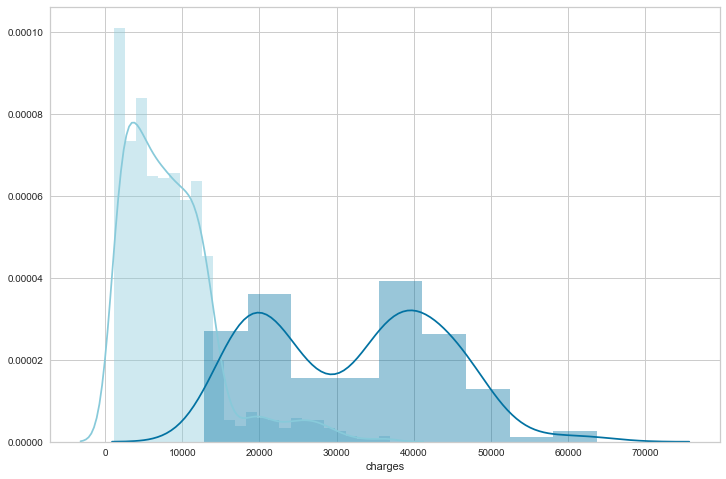

In [351]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(sns.distplot(df[(df.smoker_cluster == 0)]["charges"],color='c'))
#ax1.set_title('Distribution of charges for cluster 0')
ax2 = fig.add_subplot(sns.distplot(df[(df.smoker_cluster == 1)]['charges'],color='b'))

In [352]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y2 = kmeans.fit_predict(X)

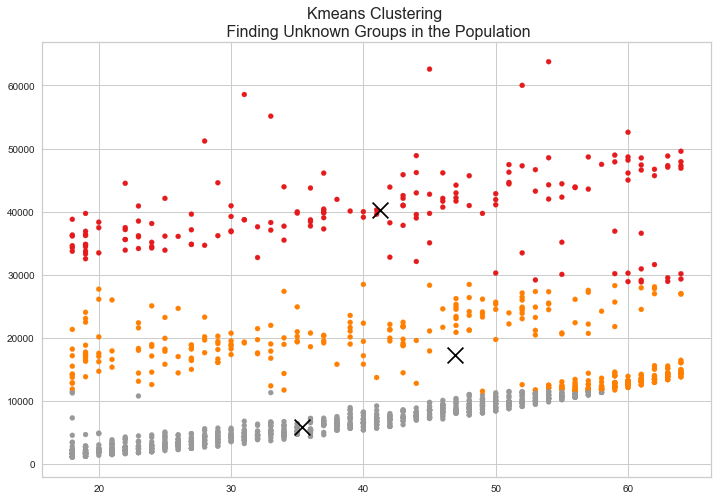

In [355]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,1],X.values[:,2], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,1] ,kmeans.cluster_centers_[:,2], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

In [360]:
df['age_cluster']=y2
df

,charges,bmi,age,bmi_cluster,smoker_cluster,age_cluster
0,16884.92400,Overweight,Young Adult,1,1,1
1,1725.55230,obese,Young Adult,0,0,0
2,4449.46200,obese,Young Adult,0,0,0
3,21984.47061,Normalweight,Young Adult,1,0,1
4,3866.85520,Overweight,Young Adult,0,0,0
...,...,...,...,...,...,...
1333,10600.54830,obese,Senior Adult,0,0,0
1334,2205.98080,obese,Young Adult,0,0,0
1335,1629.83350,obese,Young Adult,0,0,0
1336,2007.94500,Overweight,Young Adult,0,0,0
